In [3]:
import pandas as pd

train_df = pd.read_parquet('/projects/florence_echo/ankush_agent_projects/SFT/train-00000-of-00001.parquet')
val_df = pd.read_parquet('/projects/florence_echo/ankush_agent_projects/SFT/validation-00000-of-00001.parquet')
test_df = pd.read_parquet('/projects/florence_echo/ankush_agent_projects/SFT/test-00000-of-00001.parquet')

#filter rows with choice_type as 'single' and "exp" is not null
train_df = train_df[(train_df['choice_type'] == 'single') & (train_df['exp'].notnull())]
val_df = val_df[(val_df['choice_type'] == 'single') & (val_df['exp'].notnull())]
test_df = test_df[(test_df['choice_type'] == 'single') & (test_df['exp'].notnull())]

print(train_df.shape)
print(val_df.shape) 
print(test_df.shape)

(106370, 11)
(1472, 11)
(4134, 11)


In [4]:
test_df.cop.value_counts()

cop
-1    4134
Name: count, dtype: int64

In [5]:
new_test_df = val_df

In [6]:
#stratify on 'subject_name' split the train_df into train and validation set
train_subjects = train_df['subject_name'].unique()
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and validation sets, stratified by 'subject_name'
train_set, val_set = train_test_split(
    train_df,
    test_size=0.2,  # Adjust the test size as needed
    stratify=train_df['subject_name'],
    random_state=42  # Set a random state for reproducibility
)

# Print the number of samples in each set
print(f"Number of training samples: {len(train_set)}")
print(f"Number of validation samples: {len(val_set)}")


Number of training samples: 85096
Number of validation samples: 21274


#EDA

/tmp/ipykernel_3996224/436871601.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subject_counts.index, rotation=45, ha='right')
/tmp/ipykernel_3996224/436871601.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subject_counts.index, rotation=45, ha='right')
/tmp/ipykernel_3996224/436871601.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subject_counts.index, rotation=45, ha='right')


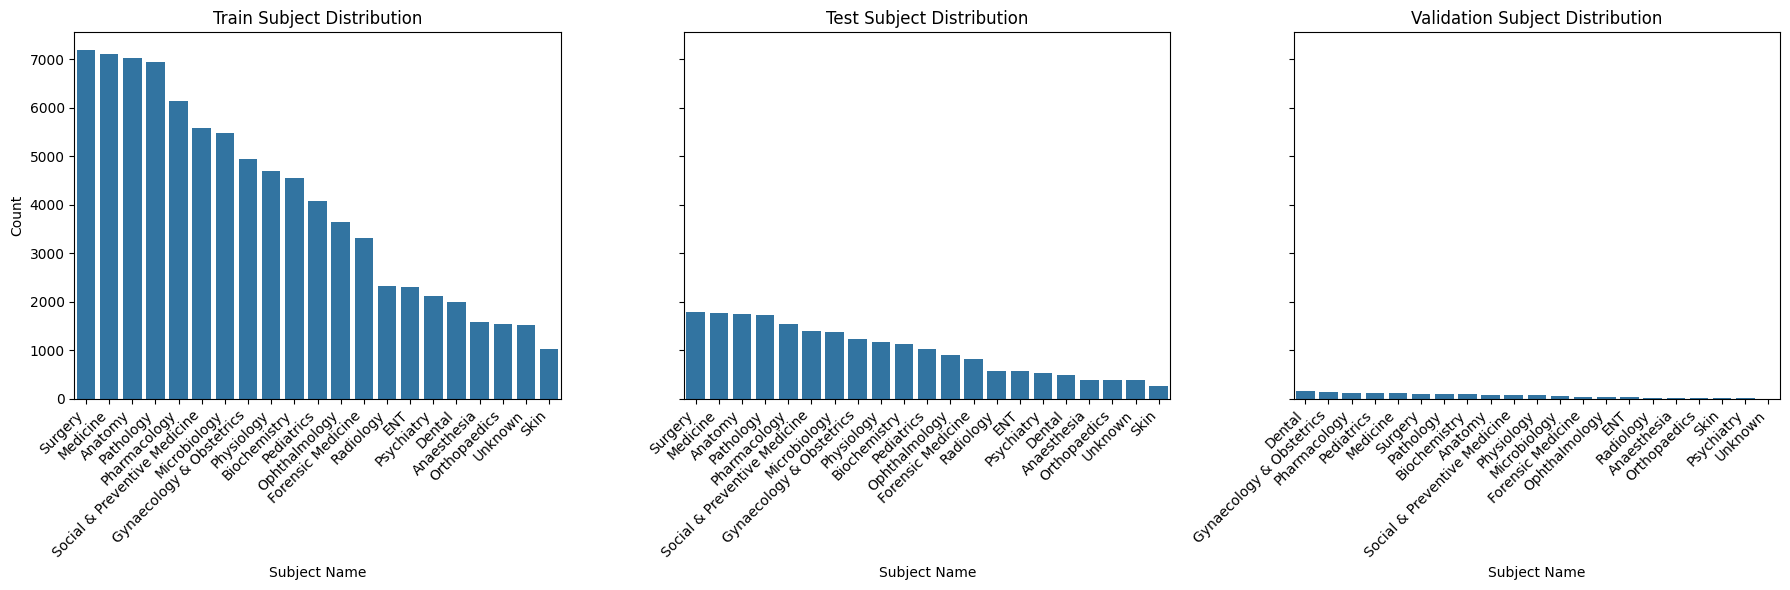

Chi-Square Test between Train and Test:
Chi-Square Statistic = 595.0923, p-value = 0.0000

Chi-Square Test between Train and Validation:
Chi-Square Statistic = 0.0028, p-value = 1.0000



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Function to plot subject distribution
def plot_distribution(df, dataset_name, ax):
    subject_counts = df['subject_name'].value_counts()
    sns.barplot(x=subject_counts.index, y=subject_counts.values, ax=ax)
    ax.set_title(f'{dataset_name} Subject Distribution')
    ax.set_ylabel('Count')
    ax.set_xlabel('Subject Name')
    ax.set_xticklabels(subject_counts.index, rotation=45, ha='right')

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for train, test, and validation
plot_distribution(train_set, 'Train', axes[0])
plot_distribution(val_set, 'Test', axes[1])
plot_distribution(new_test_df, 'Validation', axes[2])

plt.tight_layout()
plt.show()

# Statistical test: Chi-Square Test
def chi_square_test(df1, df2, name1, name2):
    subject_counts1 = df1['subject_name'].value_counts()
    subject_counts2 = df2['subject_name'].value_counts()

    # Align indices
    all_subjects = set(subject_counts1.index).union(set(subject_counts2.index))
    subject_counts1 = subject_counts1.reindex(all_subjects, fill_value=0)
    subject_counts2 = subject_counts2.reindex(all_subjects, fill_value=0)

    # Perform Chi-Square Test
    chi2, p, dof, expected = chi2_contingency([subject_counts1.values, subject_counts2.values])
    print(f'Chi-Square Test between {name1} and {name2}:')
    print(f'Chi-Square Statistic = {chi2:.4f}, p-value = {p:.4f}\n')

# Compare distributions
chi_square_test(train_set, new_test_df, 'Train', 'Test')
chi_square_test(train_set, val_set, 'Train', 'Validation')



In [9]:
#save the new train and validation set
train_set.to_parquet('/projects/florence_echo/ankush_agent_projects/SFT/train-00000-of-00001_new.parquet')
val_set.to_parquet('/projects/florence_echo/ankush_agent_projects/SFT/validation-00000-of-00001_new.parquet')
new_test_df.to_parquet('/projects/florence_echo/ankush_agent_projects/SFT/test-00000-of-00001_new.parquet')

In [17]:
chr(65 + 3)

'D'

In [15]:
train_set.cop.value_counts()

cop
0    26777
1    23490
2    19736
3    15093
Name: count, dtype: int64